In [10]:
#import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#load data
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


Using TensorFlow backend.


11485184/11490434 [============================>.] - ETA: 0s

5


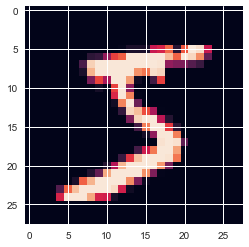

In [12]:
plt.imshow(X_train[0])
print(y_train[0])

In [13]:
print("train features: {}; train labels: {}".format(X_train.shape, y_train.shape))
print("test features: {}; test labels: {}".format(X_test.shape, y_test.shape))

train features: (60000, 28, 28); train labels: (60000,)
test features: (10000, 28, 28); test labels: (10000,)


In [25]:
#reshape data
from keras.utils import to_categorical

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test_mat = to_categorical(y_test, num_classes=10)

In [26]:
# create model

from keras.layers import Conv2D, MaxPool2D, Dense, Activation, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(10, kernel_size=3, input_shape=(28, 28, 1)))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
#training model

from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=1, mode='auto')
model.fit(x=X_train, y=y_train, batch_size=1000, epochs=30, verbose=1, callbacks=[es])

Epoch 1/30
60000/60000 [==============================] - 2s - loss: 1.7892 - acc: 0.8789     
Epoch 2/30
 5000/60000 [=>............................] - ETA: 2s - loss: 0.5378 - acc: 0.9526

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:496: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 2s - loss: 0.4643 - acc: 0.9594     
Epoch 3/30
60000/60000 [==============================] - 2s - loss: 0.3835 - acc: 0.9653     
Epoch 4/30
60000/60000 [==============================] - 2s - loss: 0.3307 - acc: 0.9698     
Epoch 5/30
60000/60000 [==============================] - 2s - loss: 0.3032 - acc: 0.9720     
Epoch 6/30
60000/60000 [==============================] - 2s - loss: 0.2883 - acc: 0.9731     
Epoch 7/30
60000/60000 [==============================] - 2s - loss: 0.2611 - acc: 0.9755     
Epoch 8/30
60000/60000 [==============================] - 2s - loss: 0.2421 - acc: 0.9770     
Epoch 9/30
60000/60000 [==============================] - 2s - loss: 0.2345 - acc: 0.9777     
Epoch 10/30
60000/60000 [==============================] - 2s - loss: 0.2120 - acc: 0.9795     
Epoch 11/30
60000/60000 [==============================] - 2s - loss: 0.2108 - acc: 0.9797     
Epoch 12/30
60000/60000 [==============================] - 

In [37]:
model.evaluate(X_test, y_test_mat, verbose=1)

 9920/10000 [============================>.] - ETA: 0s

[0.34598261206778397, 0.96989999999999998]